# WEB SCRAPING

It's recommended to use this notebook for exploration purposes.

In [64]:
import requests
import time

url="https://ycharts.com/companies/TSLA/revenues"




headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url,time.sleep(10),headers = headers).text
    
    
response

'\n\n\n\n\n\n\n\n\n<!doctype html>\n<html lang="en" ng-jq>\n    <head>\n        <!-- Google Tag Manager -->\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n    new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n    j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n    \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n    })(window,document,\'script\',\'dataLayer\',\'GTM-KHF6SRC\');</script>\n    <!-- End Google Tag Manager -->\n        <title>\n        Tesla Revenue (Quarterly) Analysis | YCharts\n        </title>\n\n        <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<!-- This code allows us to correctly display the page on mobile devices -->\n<script defer>\n    var viewport = document.querySelector(\'meta[name=viewport]\');\n    if (viewport) {\n        var minWidth = 700;\n        if (screen.width < minWidth) {\n            document.head.remo

In [65]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response,"html.parser")
soup


<!DOCTYPE html>

<html lang="en" ng-jq="">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-KHF6SRC');</script>
<!-- End Google Tag Manager -->
<title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer="">
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
     

In [66]:
import pandas as pd

tesla=soup.find_all("td")

tesla

[<td>September 30, 2024</td>,
 <td class="text-right">
                             
                                 25.18B
                             
                         </td>,
 <td>June 30, 2024</td>,
 <td class="text-right">
                             
                                 25.50B
                             
                         </td>,
 <td>March 31, 2024</td>,
 <td class="text-right">
                             
                                 21.30B
                             
                         </td>,
 <td>December 31, 2023</td>,
 <td class="text-right">
                             
                                 25.17B
                             
                         </td>,
 <td>September 30, 2023</td>,
 <td class="text-right">
                             
                                 23.35B
                             
                         </td>,
 <td>June 30, 2023</td>,
 <td class="text-right">
                         

# LIMPIEZA DE DATOS

In [88]:
tables = soup.find_all("table")

dates = [row.find_all("td")[0].text.strip() for table in tables for row in table.find("tbody").find_all("tr")]
values = [row.find_all("td")[1].text.strip() for table in tables for row in table.find("tbody").find_all("tr")]

df = pd.DataFrame({"Date": dates, "Revenue": values})

df = df.replace({",": "", "B": ""}, regex=True).dropna()
pd.set_option("display.max_columns", None)

df_filtro = df[df["Date"].str.contains(r'\w{3,9}\s\d{2}\s\d{4}', regex=True)]
print(df_filtro)

df_filtro = df_filtro[df_filtro["Revenue"] != ""]
df_filtro.head()

                 Date  Revenue
0   September 30 2024    25.18
1        June 30 2024    25.50
2       March 31 2024    21.30
3    December 31 2023    25.17
4   September 30 2023    23.35
5        June 30 2023    24.93
6       March 31 2023    23.33
7    December 31 2022    24.32
8   September 30 2022    21.45
9        June 30 2022    16.93
10      March 31 2022    18.76
11   December 31 2021    17.72
12  September 30 2021    13.76
13       June 30 2021    11.96
14      March 31 2021    10.39
15   December 31 2020    10.74
16  September 30 2020    8.771
17       June 30 2020    6.036
18      March 31 2020    5.985
19   December 31 2019    7.384
20  September 30 2019    6.303
21       June 30 2019     6.35
22      March 31 2019    4.541
23   December 31 2018    7.226
24  September 30 2018    6.824
25       June 30 2018    4.002
26      March 31 2018    3.409
27   December 31 2017    3.288
28  September 30 2017    2.985
29       June 30 2017    2.790
30      March 31 2017    2.696
31   Dec

,Date,Revenue
0,September 30 2024,25.18
1,June 30 2024,25.50
2,March 31 2024,21.30
3,December 31 2023,25.17
4,September 30 2023,23.35


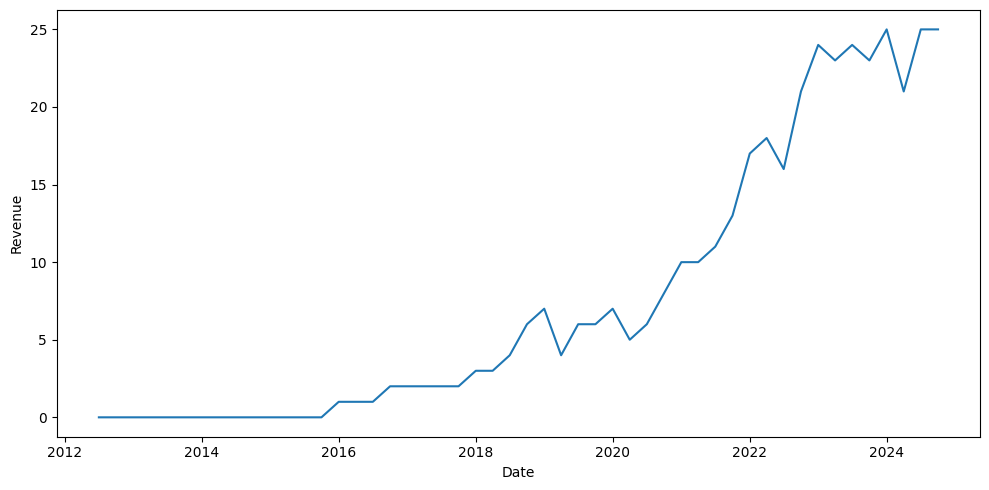

In [89]:
fig, axis = plt.subplots(figsize = (10, 5))

df_filtro["Date"] = pd.to_datetime(df_filtro["Date"])
df_filtro["Revenue"] = pd.to_numeric(df_filtro["Revenue"], errors='coerce')
df_filtro["Revenue"] = df_filtro["Revenue"].fillna(0).astype(int)
sns.lineplot(data = df_filtro, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

/tmp/ipykernel_711/1877083048.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["Date"] < 2023], x = "Date", y = "Revenue", palette="flare")


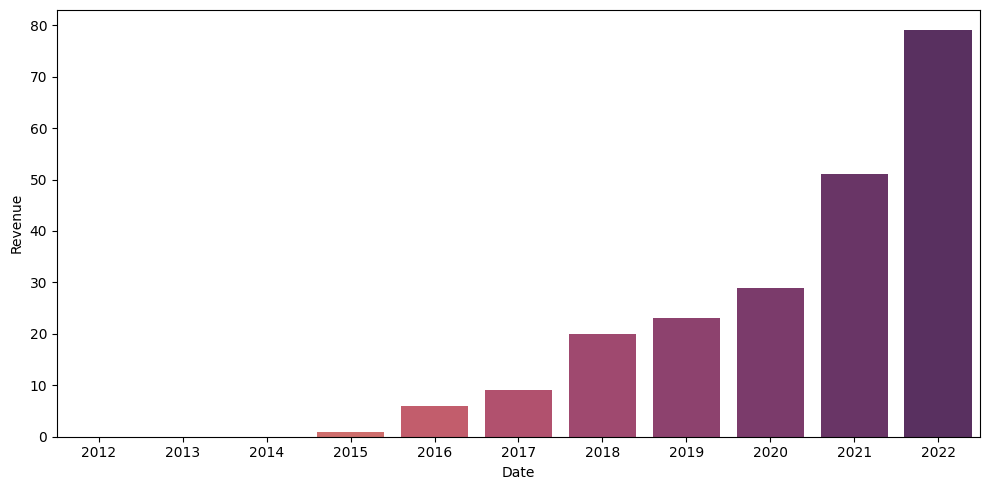

In [90]:
fig, axis = plt.subplots(figsize = (10, 5))

df_filtro["Date"] = pd.to_datetime(df_filtro["Date"])
tesla_revenue_yearly = df_filtro.groupby(df_filtro["Date"].dt.year)["Revenue"].sum().reset_index()

sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["Date"] < 2023], x = "Date", y = "Revenue", palette="flare")

plt.tight_layout()

plt.show()

/tmp/ipykernel_711/3078544680.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = tesla_revenue_monthly, x = "Date", y = "Revenue", palette="light:#5A9")


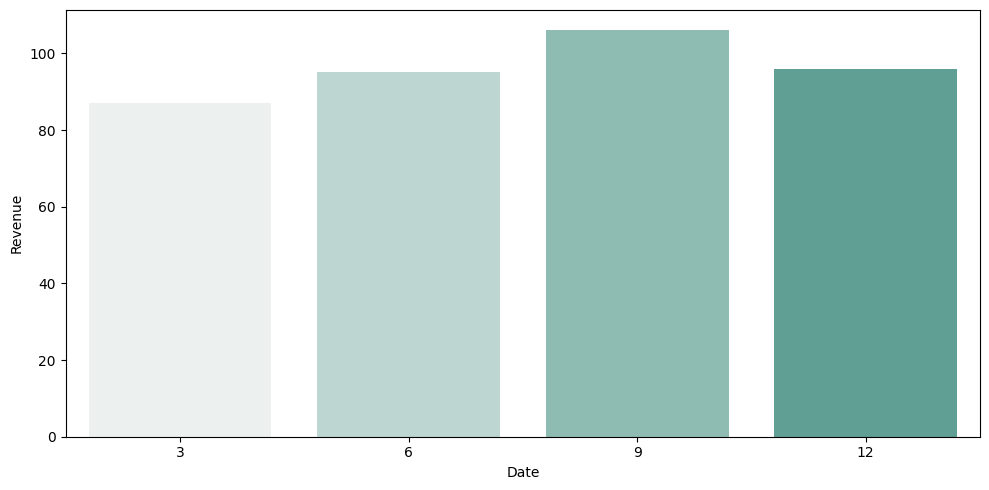

In [91]:
#Beneficio mensual

fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue_monthly = df_filtro.groupby(df_filtro["Date"].dt.month)["Revenue"].sum().reset_index()

sns.barplot(data = tesla_revenue_monthly, x = "Date", y = "Revenue", palette="light:#5A9")

plt.tight_layout()

plt.show()

In [67]:
tesla_clean=[row.text.strip() for row in tesla]
tesla_clean

['September 30, 2024',
 '25.18B',
 'June 30, 2024',
 '25.50B',
 'March 31, 2024',
 '21.30B',
 'December 31, 2023',
 '25.17B',
 'September 30, 2023',
 '23.35B',
 'June 30, 2023',
 '24.93B',
 'March 31, 2023',
 '23.33B',
 'December 31, 2022',
 '24.32B',
 'September 30, 2022',
 '21.45B',
 'June 30, 2022',
 '16.93B',
 'March 31, 2022',
 '18.76B',
 'December 31, 2021',
 '17.72B',
 'September 30, 2021',
 '13.76B',
 'June 30, 2021',
 '11.96B',
 'March 31, 2021',
 '10.39B',
 'December 31, 2020',
 '10.74B',
 'September 30, 2020',
 '8.771B',
 'June 30, 2020',
 '6.036B',
 'March 31, 2020',
 '5.985B',
 'December 31, 2019',
 '7.384B',
 'September 30, 2019',
 '6.303B',
 'June 30, 2019',
 '6.35B',
 'March 31, 2019',
 '4.541B',
 'December 31, 2018',
 '7.226B',
 'September 30, 2018',
 '6.824B',
 'June 30, 2018',
 '4.002B',
 'March 31, 2018',
 '3.409B',
 'December 31, 2017',
 '3.288B',
 'September 30, 2017',
 '2.985B',
 'June 30, 2017',
 '2.790B',
 'March 31, 2017',
 '2.696B',
 'December 31, 2016',
 '2.

In [86]:
date=pd.DataFrame({'Date':tesla_clean[::2]})
date

,Date
0,"September 30, 2024"
1,"June 30, 2024"
2,"March 31, 2024"
3,"December 31, 2023"
4,"September 30, 2023"
...,...
59,Gross Profit Margin (Quarterly)
60,Profit Margin (Quarterly)
61,Earnings Yield
62,Operating Earnings Yield


In [87]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    64 non-null     object
dtypes: object(1)
memory usage: 644.0+ bytes


In [83]:
# for x in date:
#   if "Profit" in x:
#     date.remove(x)
#   elif "Yield" in x:
#     date.remove(x)
#   elif "(Quarterly)" in x:
#     date.remove(x)
#   elif "Enterprise" in x:
#     date.remove(x)
#   elif "Operating" in x:
#     date.remove(x)
#   elif "Co" in x:
#     date.remove(x)
#   elif "Inc" in x:
#     date.remove(x)
#   elif "Ltd" in x:
#     date.remove(x)    
# date

In [69]:
value=tesla_clean[1::2]
value


['25.18B',
 '25.50B',
 '21.30B',
 '25.17B',
 '23.35B',
 '24.93B',
 '23.33B',
 '24.32B',
 '21.45B',
 '16.93B',
 '18.76B',
 '17.72B',
 '13.76B',
 '11.96B',
 '10.39B',
 '10.74B',
 '8.771B',
 '6.036B',
 '5.985B',
 '7.384B',
 '6.303B',
 '6.35B',
 '4.541B',
 '7.226B',
 '6.824B',
 '4.002B',
 '3.409B',
 '3.288B',
 '2.985B',
 '2.790B',
 '2.696B',
 '2.285B',
 '2.298B',
 '1.270B',
 '1.147B',
 '1.214B',
 '936.79M',
 '954.98M',
 '939.88M',
 '956.66M',
 '851.80M',
 '769.35M',
 '620.54M',
 '615.22M',
 '431.35M',
 '405.14M',
 '561.79M',
 '306.33M',
 '50.10M',
 '26.65M',
 '48.76B',
 '46.20B',
 '200.04M',
 '874.00M',
 '3.122M',
 '2.167B',
 '22.41B',
 '0.62',
 '1.224T',
 '19.84%',
 '8.61%',
 '0.95%',
 '0.61%',
 '0.9851']

In [81]:
for x in value:
  if "%" in x:
    value.remove(x)

value

['25.18B',
 '25.50B',
 '21.30B',
 '25.17B',
 '23.35B',
 '24.93B',
 '23.33B',
 '24.32B',
 '21.45B',
 '16.93B',
 '18.76B',
 '17.72B',
 '13.76B',
 '11.96B',
 '10.39B',
 '10.74B',
 '8.771B',
 '6.036B',
 '5.985B',
 '7.384B',
 '6.303B',
 '6.35B',
 '4.541B',
 '7.226B',
 '6.824B',
 '4.002B',
 '3.409B',
 '3.288B',
 '2.985B',
 '2.790B',
 '2.696B',
 '2.285B',
 '2.298B',
 '1.270B',
 '1.147B',
 '1.214B',
 '936.79M',
 '954.98M',
 '939.88M',
 '956.66M',
 '851.80M',
 '769.35M',
 '620.54M',
 '615.22M',
 '431.35M',
 '405.14M',
 '561.79M',
 '306.33M',
 '50.10M',
 '26.65M',
 '48.76B',
 '46.20B',
 '200.04M',
 '874.00M',
 '3.122M',
 '2.167B',
 '22.41B',
 '0.62',
 '1.224T',
 '0.61%',
 '0.9851']

In [82]:
df=pd.DataFrame({'Date':date,'Revenue':value})
df

ValueError: All arrays must be of the same length

ValueError: time data "General Motors Co" doesn't match format "%B %d, %Y", at position 50. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

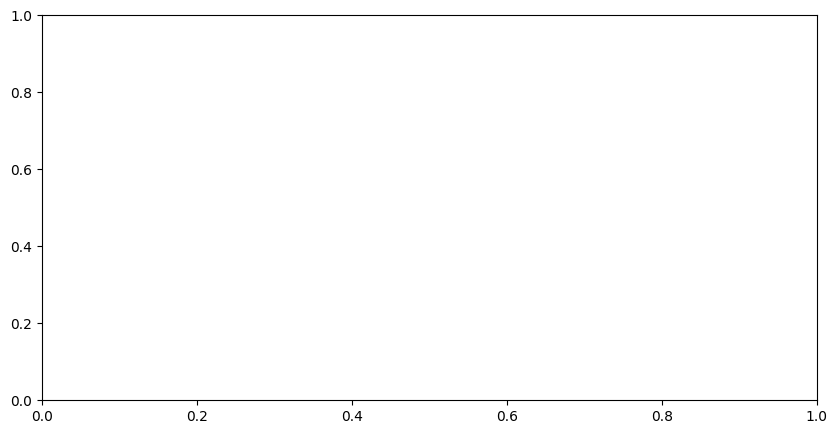

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

df["Date"] = pd.to_datetime(df["Date"])
tesla_revenue_yearly = df.groupby(df["Date"].dt.year)["Revenue"].sum().reset_index()

sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["Date"] < 2023], x = "Date", y = "Revenue", palette="flare")

plt.tight_layout()

plt.show()